# Enhancing Customer Loyalty through Predictive Churn Analysis: A Binary Classification Approach for Banking Institutions

Developing a supervised learning model that analyzes bank customer data to predict customer churn.

## Project Background and Necessity
Banks and financial institutions must prioritize developing strategies to minimize customer churn, as it results in significant revenue loss. Attracting new customers is substantially more expensive than retaining existing ones. Consequently, crafting a predictive model for customer churn is crucial. Such a model enables early identification and intervention for cases at high risk of churn, enhancing customer satisfaction and lowering the churn rate. Moreover, these models facilitate data-driven decision-making in marketing strategies and the enhancement of customer service, ensuring a more targeted and effective approach to customer retention.

## Dataset Description
1. **RowNumber**: Corresponds to the record (row) number and has no effect on the output.
2. **CustomerId**: Contains random values and has no effect on customer leaving the bank.
3. **Surname**: The surname of a customer has no impact on their decision to leave the bank.
4. **CreditScore**: Can have an effect on customer churn, since a customer with a higher credit score is less likely to leave the bank.
5. **Geography**: A customer’s location can affect their decision to leave the bank.
6. **Gender**: It’s interesting to explore whether gender plays a role in a customer leaving the bank.
7. **Age**: This is certainly relevant, since older customers are less likely to leave their bank than younger ones.
8. **Tenure**: Refers to the number of years that the customer has been a client of the bank. Normally, older clients are more loyal and less likely to leave a bank.
9. **Balance**: Also a very good indicator of customer churn, as people with a higher balance in their accounts are less likely to leave the bank compared to those with lower balances.
10. **NumOfProducts**: Refers to the number of products that a customer has purchased through the bank.
11. **HasCrCard**: Denotes whether or not a customer has a credit card. This column is also relevant, since people with a credit card are less likely to leave the bank.
12. **IsActiveMember**: Active customers are less likely to leave the bank.
13. **EstimatedSalary**: As with balance, people with lower salaries are more likely to leave the bank compared to those with higher salaries.
14. **Exited**: Whether or not the customer left the bank.

## Datasets Overview
Both datasets can be viewed at https://www.kaggle.com/competitions/playground-series-s4e1/data.

### Training Dataset (`train.csv`)
- This dataset is utilized for model training. It includes a range of features relevant to bank customers, such as demographics, account details, and financial behaviors. The binary target variable, `Exited`, indicates whether a customer has left the bank (1) or not (0).

### Test Dataset (`test.csv`)
- The test dataset is used for evaluating the model's performance. Similar to the training dataset, it contains the same features but lacks the `Exited` variable. The objective is to predict the probability of each customer in the test dataset exiting the bank.




## Importing Necessary Modules

In [97]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.preprocessing import OrdinalEncoder, StandardScaler
from sklearn.model_selection import train_test_split
warnings.filterwarnings('ignore')

df_train=pd.read_csv('train.csv')
df_test=pd.read_csv('test.csv')

## Understanding Datas
Checking the basic data overview and distribution and basic data statistics

In [98]:
df_train.head()

,id,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,0,15674932,Okwudilichukwu,668,France,Male,33.0,3,0.00,2,1.0,0.0,181449.97,0
1,1,15749177,Okwudiliolisa,627,France,Male,33.0,1,0.00,2,1.0,1.0,49503.50,0
2,2,15694510,Hsueh,678,France,Male,40.0,10,0.00,2,1.0,0.0,184866.69,0
3,3,15741417,Kao,581,France,Male,34.0,2,148882.54,1,1.0,1.0,84560.88,0
4,4,15766172,Chiemenam,716,Spain,Male,33.0,5,0.00,2,1.0,1.0,15068.83,0


In [99]:
# Check data dimensions
df_train.shape, df_test.shape

((165034, 14), (110023, 13))

In [100]:
# Check data columns
df_train.columns

Index(['id', 'CustomerId', 'Surname', 'CreditScore', 'Geography', 'Gender',
       'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [101]:
df_test.columns

Index(['id', 'CustomerId', 'Surname', 'CreditScore', 'Geography', 'Gender',
       'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary'],
      dtype='object')

In [102]:
# Delete unnecessary columns
df_train.drop(columns=['id','CustomerId'],inplace=True)
df_test.drop(columns=['id','CustomerId'],inplace=True)

In [103]:
# Check data distribution
df_train.describe()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,165034.000000,165034.000000,165034.000000,165034.000000,165034.000000,165034.000000,165034.000000,165034.000000,165034.000000
mean,656.454373,38.125888,5.020353,55478.086689,1.554455,0.753954,0.497770,112574.822734,0.211599
std,80.103340,8.867205,2.806159,62817.663278,0.547154,0.430707,0.499997,50292.865585,0.408443
min,350.000000,18.000000,0.000000,0.000000,1.000000,0.000000,0.000000,11.580000,0.000000
25%,597.000000,32.000000,3.000000,0.000000,1.000000,1.000000,0.000000,74637.570000,0.000000
50%,659.000000,37.000000,5.000000,0.000000,2.000000,1.000000,0.000000,117948.000000,0.000000
75%,710.000000,42.000000,7.000000,119939.517500,2.000000,1.000000,1.000000,155152.467500,0.000000
max,850.000000,92.000000,10.000000,250898.090000,4.000000,1.000000,1.000000,199992.480000,1.000000


In [104]:
# Check data type
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 165034 entries, 0 to 165033
Data columns (total 12 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   Surname          165034 non-null  object 
 1   CreditScore      165034 non-null  int64  
 2   Geography        165034 non-null  object 
 3   Gender           165034 non-null  object 
 4   Age              165034 non-null  float64
 5   Tenure           165034 non-null  int64  
 6   Balance          165034 non-null  float64
 7   NumOfProducts    165034 non-null  int64  
 8   HasCrCard        165034 non-null  float64
 9   IsActiveMember   165034 non-null  float64
 10  EstimatedSalary  165034 non-null  float64
 11  Exited           165034 non-null  int64  
dtypes: float64(5), int64(4), object(3)
memory usage: 15.1+ MB


## Data Cleaning
Verify if missing values exist. As the data contains no missing entries, it is forwarded without undergoing any additional preprocessing for missing value replacement.

In [105]:
# Check missing values ​​in training data
df_train.isnull().sum()

Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [106]:
# Check missing values ​​in test data
df_test.isnull().sum()

Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
dtype: int64

In [107]:
# Check Surname data unique value
df_train['Surname'].unique()

array(['Okwudilichukwu', 'Okwudiliolisa', 'Hsueh', ..., 'Aliyev',
       'McMinn', 'Elkins'], dtype=object)

In [108]:
# Check Surname data unique value counts
df_train['Surname'].value_counts()

Hsia         2456
T'ien        2282
Hs?          1611
Kao          1577
Maclean      1577
             ... 
Samaniego       1
Lawley          1
Bonwick         1
Tennant         1
Elkins          1
Name: Surname, Length: 2797, dtype: int64

In [109]:
# Encoding all 2797 unique names could be problematic in terms of the curse of dimensionality and that it would be difficult to derive great insight, so we deleted the column.
df_train.drop(columns='Surname',inplace=True)
df_test.drop(columns='Surname',inplace=True)

## EDA Preparation

In [110]:
# split numerical and categorical columns
num_col=[]
cat_col=[]
for col in df_train.drop(columns='Exited').columns:
    if df_train[col].dtype=='object':
        cat_col.append(col)
    else :
        num_col.append(col)
print(num_col)
print(cat_col)

['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary']
['Geography', 'Gender']


## Examine the Distribution of the 'Exited' Target Column

<function matplotlib.pyplot.show(close=None, block=None)>

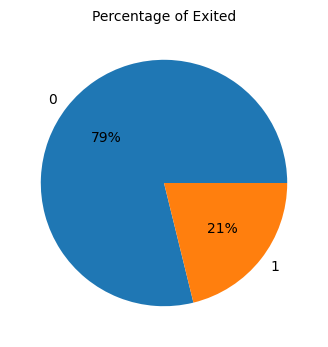

In [111]:
plt.figure(figsize=(6,4))
df_train['Exited'].value_counts().plot(kind='pie',autopct='%0.0f%%')
plt.title('Percentage of Exited',fontsize=10)
plt.ylabel('')
plt.show

The data exhibits a 79% to 21% balance. While not perfectly balanced, it is deemed sufficiently balanced to forego the application of oversampling techniques.

### Visualizing *Numerical* Columns

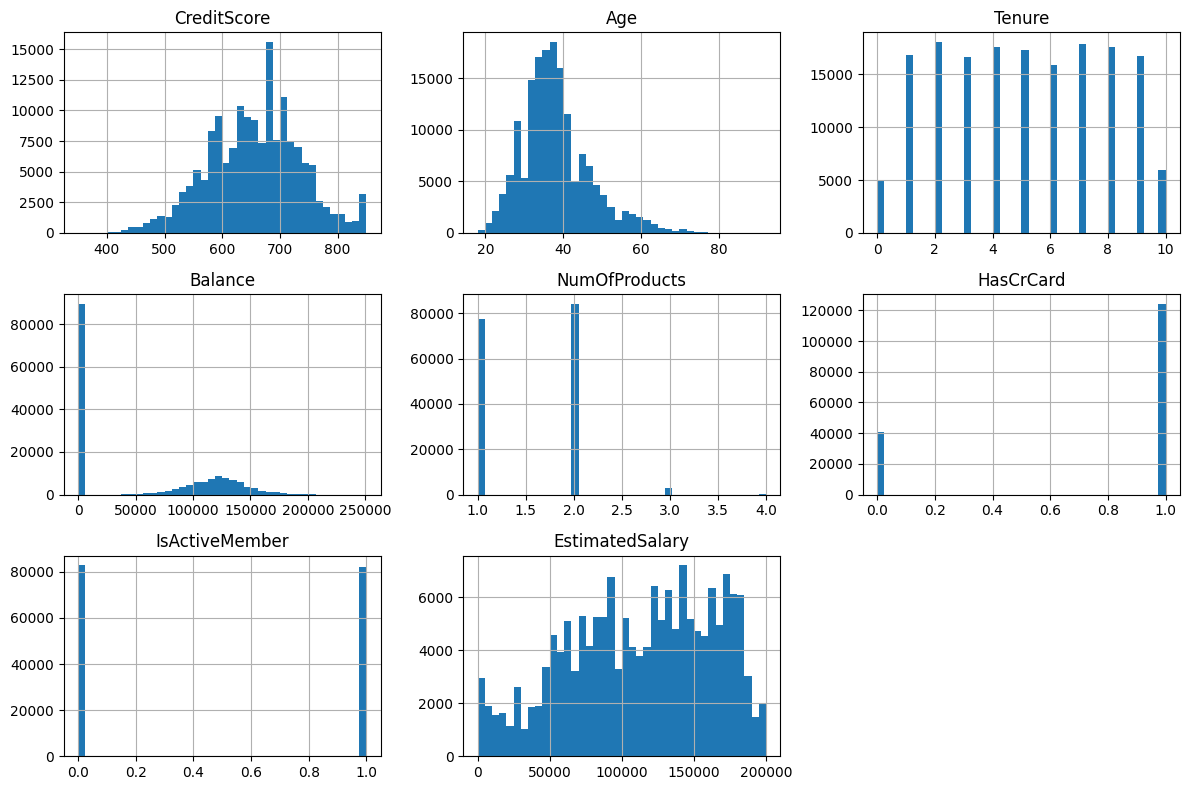

In [112]:
df_train[num_col].hist(bins=40,figsize=(12,8))
plt.tight_layout()
plt.show()

### Visualizing *Continuous* Value Columns

In [113]:
# Separate columns according to data type
cont_col=df_train[['CreditScore','Age','Balance','EstimatedSalary']]

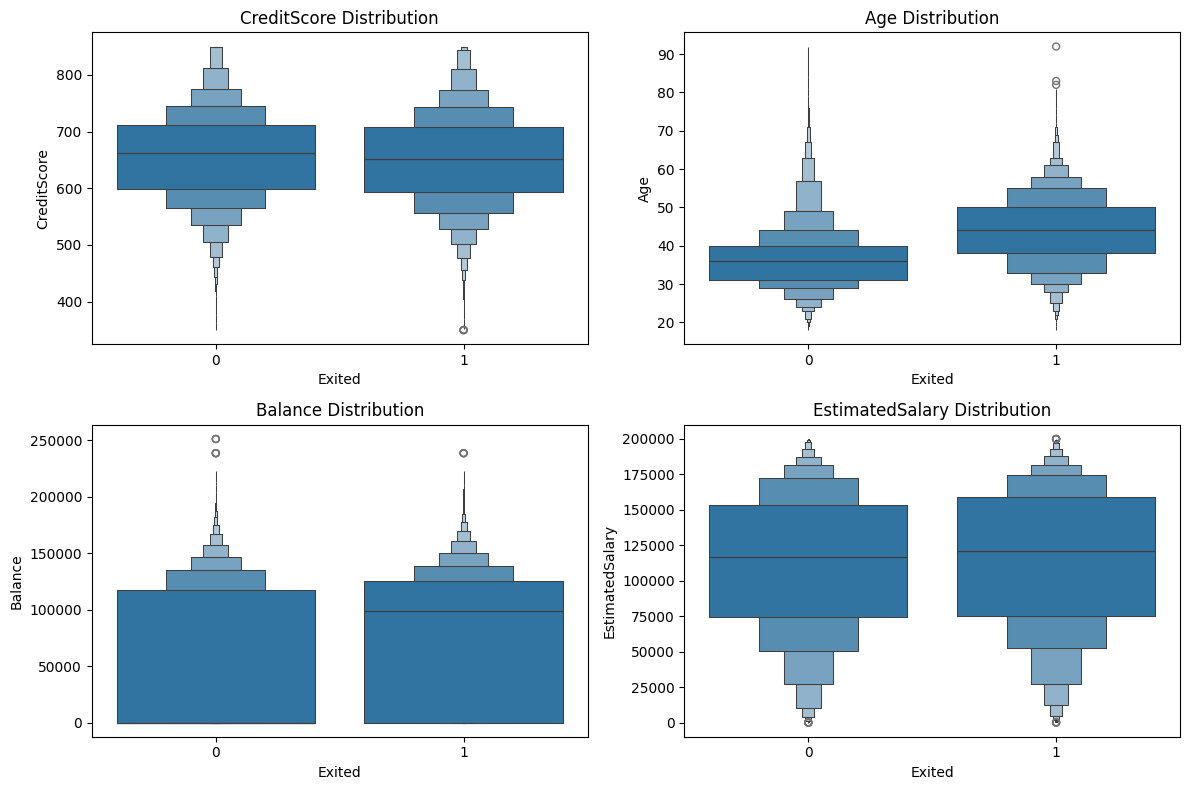

In [114]:
fig,axes=plt.subplots(nrows=len(cont_col.columns)//2 ,ncols=2,figsize=(12,8))
for idx,column in enumerate(cont_col):
    row_idx=idx//2
    col_idx=idx%2
    sns.boxenplot(x='Exited',y=column,data=df_train,ax=axes[row_idx,col_idx])
    axes[row_idx,col_idx].set_xlabel('Exited')
    axes[row_idx,col_idx].set_ylabel(column)
    axes[row_idx, col_idx].set_title(f"{column} Distribution")
plt.tight_layout()
plt.show()

### Visualization Result
The visualization results clearly indicate that older customers are more likely to churn.

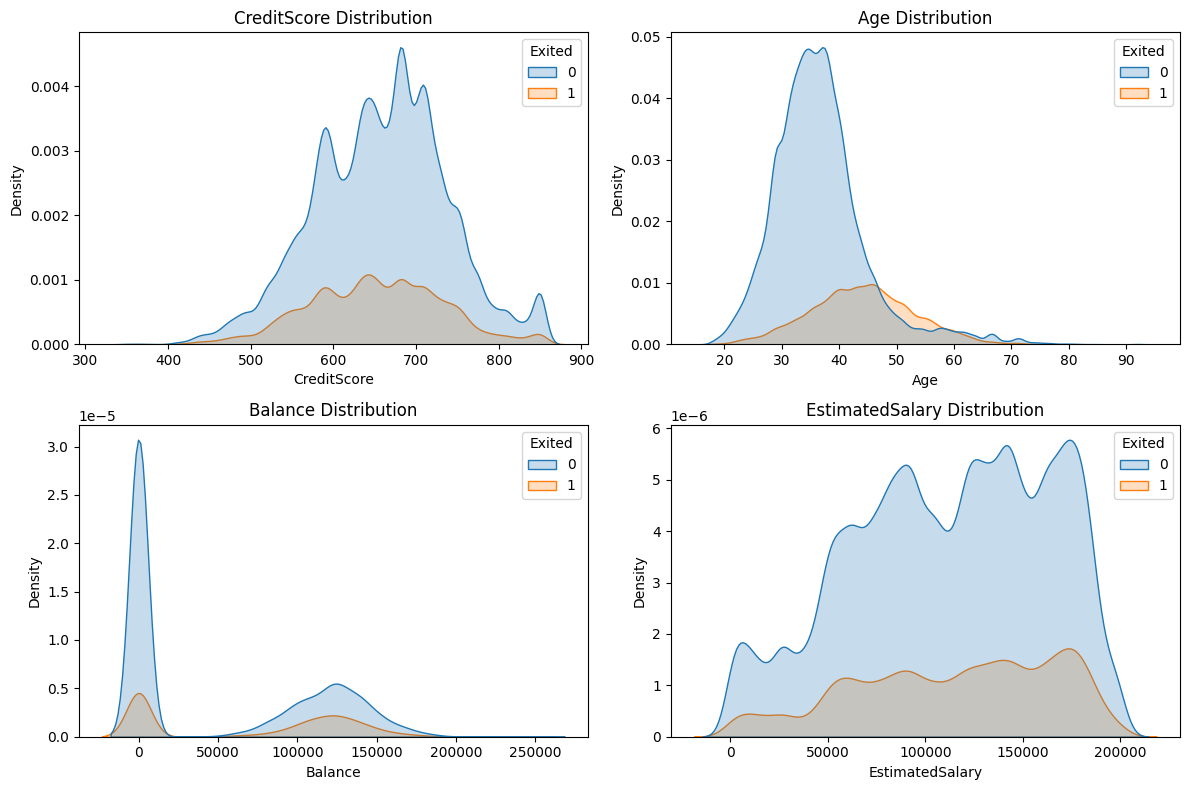

In [115]:
fig,axes=plt.subplots(nrows=len(cont_col.columns)//2 ,ncols=2,figsize=(12,8))
for idx,column in enumerate(cont_col):
    row_idx=idx//2
    col_idx=idx%2
    sns.kdeplot(x=column,hue='Exited',data=df_train,ax=axes[row_idx,col_idx],fill=True)
    axes[row_idx,col_idx].set_xlabel(column)
    axes[row_idx, col_idx].set_title(f"{column} Distribution")
plt.tight_layout()
plt.show()

## Categorical Columns EDA

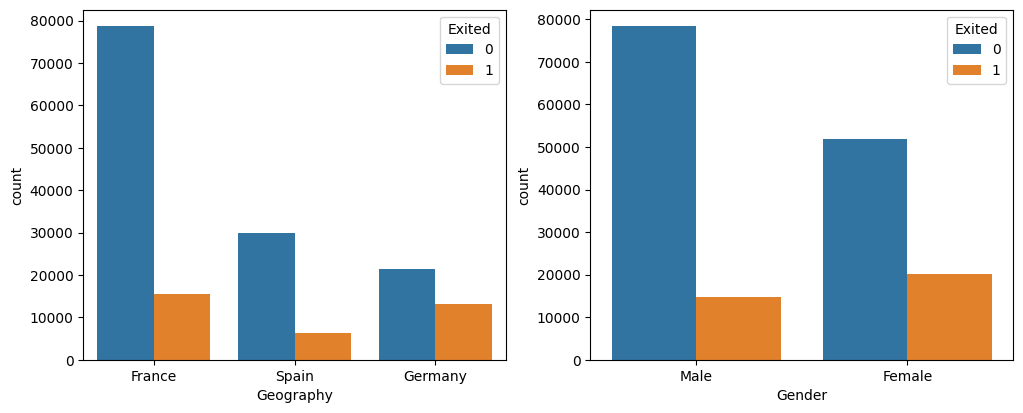

In [116]:
fig = plt.figure(figsize=(12,10))

counter = 0

for i in cat_col:

        sub = fig.add_subplot(2,2,counter+1)
        g = sns.countplot(x=i,data=df_train,hue='Exited')
        plt.xticks()
        counter += 1

The data reveals a significant number of male French customers, while indicating that female customers exhibit a higher propensity to leave the bank.

## Correlation Analysis

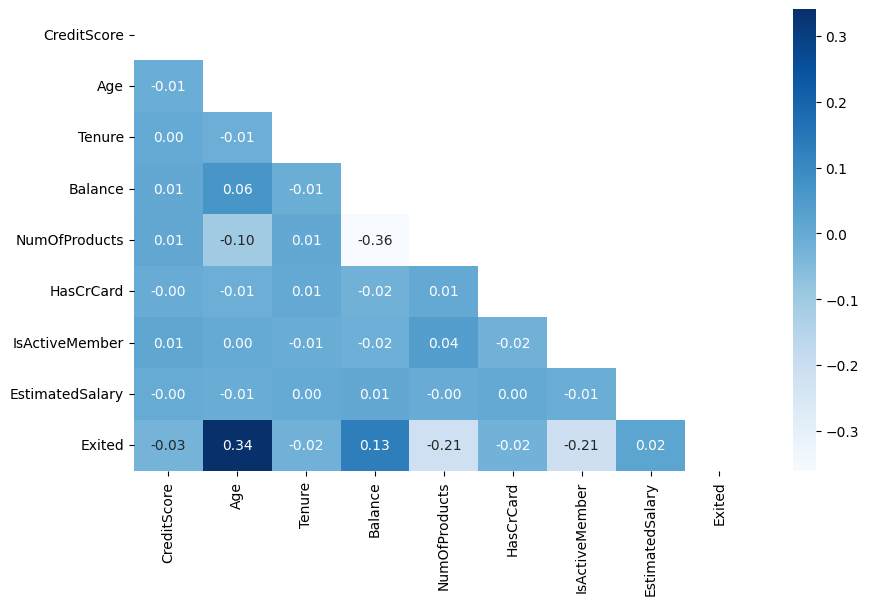

In [117]:
corr = df_train.corr(numeric_only=True)
mask = np.triu(corr)
mask=mask
plt.figure(figsize=(10, 6))
sns.heatmap(corr, annot=True,mask=mask, cmap='Blues', fmt='.2f')
plt.show()

## Data Prepration for Preprocessing

<h3>Outliers Precentage</h3>

In [118]:
#Outlier Equation
def outlier_threshhold(dataframe,column,q1=0.25,q3=0.75):
    Q1=dataframe[column].quantile(q1)
    Q3=dataframe[column].quantile(q3)
    iqr=Q3-Q1
    up_limit=Q3+1.5*iqr
    low_limit=Q1-1.5*iqr
    return low_limit,up_limit


def outlier_percentage(dataframe,column):
    low_limit,up_limit=outlier_threshhold(dataframe,column)
    outliers= [x for x in dataframe[col] if (x>up_limit) | (x<low_limit)]
    print(col)
    print("Outliers percentage:", len(outliers)/(dataframe[column].shape[0])*100,"%")
    print("-------------------------")

In [119]:
for col in (cont_col.columns):
    outlier_percentage(df_train,col)

CreditScore
Outliers percentage: 0.15330174388307863 %
-------------------------
Age
Outliers percentage: 3.8743531635905324 %
-------------------------
Balance
Outliers percentage: 0.0 %
-------------------------
EstimatedSalary
Outliers percentage: 0.0 %
-------------------------


In [120]:
# Proportion of outliers does not seem to be high, it can be left as is or replaced with IQR.
def replace_with_threshholds(dataframe,dataframe2,column):
    low_limit,up_limit=outlier_threshhold(dataframe,column)
    dataframe.loc[(dataframe[column]<low_limit),column]=low_limit
    dataframe.loc[(dataframe[column]>up_limit),column]=up_limit
    dataframe2.loc[(dataframe2[column]<low_limit),column]=low_limit
    dataframe2.loc[(dataframe2[column]>up_limit),column]=up_limit
for column in (cont_col.columns):
    replace_with_threshholds(df_train,df_test,column)

In [121]:
# Checking categorical and numerical columns for preprocessing
cat_attribs=[]
num_attribs=[]
for col in df_train.drop(columns='Exited').columns:
    if df_train[col].dtype=="object" or len(df_train[col].unique())==2 :
        cat_attribs.append(col)
    else:
        num_attribs.append(col)
print(cat_attribs)
print(num_attribs)

['Geography', 'Gender', 'HasCrCard', 'IsActiveMember']
['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary']


## Preprocessing

In [122]:
# Split the labels and the target
X,y=df_train.drop(columns='Exited'),df_train['Exited']

Log transformation is effective when preprocessing skewed data with long tails.

In [123]:
# Set column and domain shift values ​​to apply log transformation
columns_to_log_transform = ['EstimatedSalary', 'Balance']
domain_shift = 1

# Log transformation function definition
def log_transform(X, columns, shift):
    X_copy = X.copy()
    X_copy[columns] = np.log(X_copy[columns] + shift)
    return X_copy

In [124]:
# Apply log transformation
X_log_transformed = log_transform(X, columns_to_log_transform, domain_shift)
df_test_log_transformed = log_transform(df_test, columns_to_log_transform, domain_shift)

In [125]:
# Apply normalization
scaler = StandardScaler()
X_scaled = X_log_transformed.copy()
X_scaled[columns_to_log_transform] = scaler.fit_transform(X_log_transformed[columns_to_log_transform])
df_test_scaled = df_test_log_transformed.copy()
df_test_scaled[columns_to_log_transform] = scaler.transform(df_test_log_transformed[columns_to_log_transform])

In [126]:
# Categorical data encoding
encoder = OrdinalEncoder()
X_encoded = X_scaled.copy()
X_encoded[cat_attribs] = encoder.fit_transform(X_scaled[cat_attribs])
df_test_encoded = df_test_scaled.copy()
df_test_encoded[cat_attribs] = encoder.transform(df_test_scaled[cat_attribs])

In [127]:
X_1=X_encoded
X_1_test=df_test_encoded

In [128]:
#Split your data into Train and validation Data
X_train,X_valid,y_train,y_valid=train_test_split(X_1,y,test_size=0.3,random_state=42)

## ML Model Load

In [129]:
from sklearn.model_selection import cross_val_score,train_test_split
from sklearn.metrics import accuracy_score,classification_report,f1_score,mean_squared_error,roc_auc_score,precision_score,recall_score,roc_curve,ConfusionMatrixDisplay,confusion_matrix,auc
from sklearn.pipeline import make_pipeline,Pipeline
from sklearn.preprocessing import StandardScaler,LabelEncoder,OneHotEncoder,OrdinalEncoder,RobustScaler
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression,SGDClassifier, RidgeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier,ExtraTreesClassifier,AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.base import BaseEstimator,TransformerMixin
from xgboost import XGBClassifier

### Defining the Model Scores

In [130]:
def plot_roc_curve(fpr, tpr, label = None):

    plt.plot(fpr, tpr, linewidth = 2, label= 'auc= '+ str(label))
    plt.plot([0, 1], [0, 1], "k--")
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate(Recall)")
    plt.title("ROC Curve")
    plt.axis([0, 1, 0, 1])
    plt.legend(loc=4)
    plt.show()

In [131]:
def plot_confusion_matrix(target_test,target_pred):
    conf=confusion_matrix(target_test,target_pred)
    plot=ConfusionMatrixDisplay(confusion_matrix=conf, display_labels=['Not exited', 'Exited'])
    plot.plot()
    plt.show()

## Modeling

In [132]:
model_name=[]
accuracy=[]
roc_auc=[]
F1_score=[]
models=[
    DecisionTreeClassifier(random_state=42),
    RandomForestClassifier(random_state=42),
    GradientBoostingClassifier(random_state=42),
    XGBClassifier(random_state=42),
]

for model in models:
    model.fit(X_train , y_train)
    prediction = model.predict(X_valid)
    y_predict=model.predict_proba(X_valid)[:, 1]
    model_name.append(model.__class__.__name__)
    accuracy.append((accuracy_score( prediction , y_valid ) * 100 ) )
    roc_auc.append((roc_auc_score(y_valid , y_predict)*100) )
    F1_score.append((f1_score(y_valid , prediction)* 100) )

In [133]:
models_df = pd.DataFrame({"Model-Name":model_name, "Accuracy": accuracy ,'AUC':roc_auc ,'F1-Score':F1_score})
models_df

,Model-Name,Accuracy,AUC,F1-Score
0,DecisionTreeClassifier,79.980206,70.388193,53.001422
1,RandomForestClassifier,85.825372,87.244077,61.320547
2,GradientBoostingClassifier,86.481792,88.792851,62.489492
3,XGBClassifier,86.352528,88.588906,63.255207


## Best Model

In [134]:
gbc=GradientBoostingClassifier(random_state=42)

In [135]:
gbc.fit(X_train,y_train)

GradientBoostingClassifier(random_state=42)

In [136]:
y_pred_gbc = gbc.predict_proba(X_valid)[:, 1]
auc_score = roc_auc_score(y_valid, y_pred_gbc)
print("AUC score:", auc_score)

AUC score: 0.8879285133718128


<h3>Plot Confusion Matrix</h3>

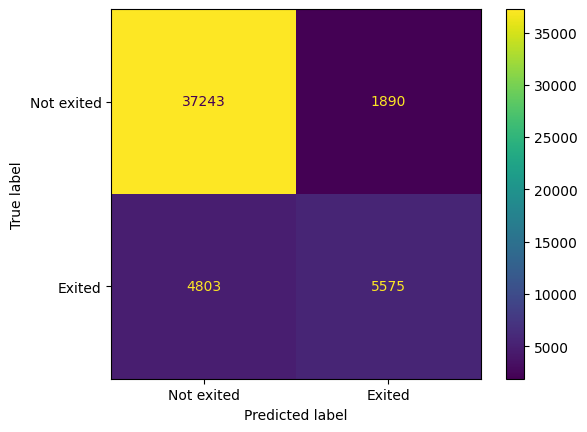

In [137]:
y_pred=gbc.predict(X_valid)
plot_confusion_matrix(y_valid,y_pred)

<h3>Plot Roc Curve</h3>

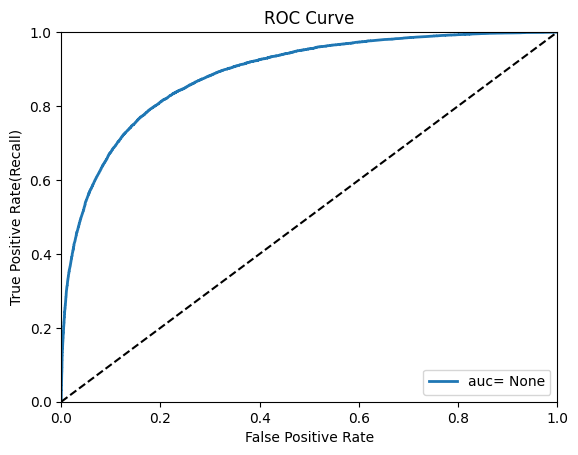

In [138]:
fpr,tpr,thresholds=roc_curve(y_valid,y_pred_gbc)
# Plot ROC curve
plot_roc_curve(fpr,tpr)

## Summary of Results and Analysis

In this project, we aimed to develop a predictive model to identify customers at high risk of churning. To achieve this, we experimented with four different machine learning models: DecisionTreeClassifier, RandomForestClassifier, GradientBoostingClassifier, and XGBClassifier. This section summarizes the performance of each model, providing insights and key findings from our analysis.

### Model Performance Comparison

1. **DecisionTreeClassifier**: This model served as our baseline, offering a straightforward approach to understanding the features' influence on customer churn. While intuitive and easy to interpret, its performance was hindered by overfitting, leading to lower generalization on unseen data.

2. **RandomForestClassifier**: As an ensemble of decision trees, the RandomForest model showed significant improvement over the DecisionTreeClassifier, reducing overfitting and enhancing predictive accuracy. Its performance, however, still left room for improvement in handling the imbalanced nature of our dataset.

3. **GradientBoostingClassifier**: Standing out among the evaluated models, the GradientBoostingClassifier demonstrated superior performance across several metrics, including accuracy, F1 score, and ROC-AUC. Its strength lies in its ability to iteratively correct errors from previous trees, leading to a highly effective model for our churn prediction task.

4. **XGBClassifier**: The XGBClassifier, known for its speed and efficiency, also performed well. While slightly trailing behind the GradientBoostingClassifier in terms of overall metrics, it offered a competitive alternative with faster training times and scalability.


### Evaluation Metrics

To accurately assess the performance of our predictive models and address the challenges presented by our dataset, especially its imbalanced nature, we employed a combination of evaluation metrics beyond mere accuracy. These metrics include the F1 score, ROC-AUC, precision, and recall. Each metric provides unique insights into the models' performance, particularly in the context of imbalanced datasets, where the proportion of actual churned customers is much lower than the proportion of retained customers. Here is an overview of each metric and the rationale for its selection:

#### F1 Score
The F1 score is the harmonic mean of precision and recall, providing a single metric that balances both the false positives and false negatives. In the context of our project, where it's critical to accurately identify as many true churn cases as possible without excessively mislabeling loyal customers as churners, the F1 score offers a more nuanced assessment of model performance than accuracy alone.

#### ROC-AUC
The Receiver Operating Characteristic (ROC) curve and the Area Under the Curve (AUC) measure a model's ability to distinguish between classes across all thresholds. This metric is particularly useful for evaluating the performance of our models in the presence of an imbalanced dataset, as it illustrates the trade-off between true positive rates and false positive rates. A higher AUC indicates a model that better discriminates between positive (churned) and negative (retained) classes.

#### Precision and Recall
Precision measures the accuracy of positive predictions (i.e., the proportion of true churned customers among all predicted as churned), while recall measures the ability to find all relevant instances (i.e., the proportion of true churned customers correctly identified by the model). Given the high cost associated with false negatives (failing to identify a customer at risk of churn), we emphasize recall in our evaluation. However, precision is also crucial to avoid inundating potentially loyal customers with unnecessary retention strategies.

#### Why These Metrics Were Chosen
The choice of these evaluation metrics was driven by the need to comprehensively assess model performance in predicting customer churn, taking into account the imbalanced nature of our dataset. Accuracy alone can be misleading in imbalanced scenarios, as a model might achieve high accuracy by merely predicting the majority class. In contrast, the selected metrics provide a more balanced view of model effectiveness, ensuring that our predictive models are both accurate and reliable in identifying at-risk customers.

By utilizing these metrics, we were able to conduct a more informed and nuanced comparison of the models, ultimately leading to the selection of the GradientBoostingClassifier as our preferred model due to its superior performance across these critical metrics.

### Key Findings and Insights

- **Imbalanced Dataset Handling**: Our dataset exhibited an imbalance in the distribution of the target variable (customer churn). This imbalance was addressed more effectively by GradientBoostingClassifier and XGBClassifier, as evidenced by their superior performance on metrics like F1 score and ROC-AUC. These metrics are crucial for imbalanced datasets as they provide a more nuanced view of model performance beyond mere accuracy.

- **Feature Importance**: Across models, certain features consistently showed a higher impact on predicting churn, such as Age, Balance, and NumOfProducts. This insight allows us to recommend targeted interventions focused on these key areas to mitigate churn risk.

- **Model Selection Rationale**: The choice of GradientBoostingClassifier as the best model was driven by its balanced performance across all relevant metrics, particularly its ability to handle imbalanced data and its robustness to overfitting compared to other models. Additionally, the interpretability of feature importance provided by this model offers valuable insights into churn predictors, enabling actionable business strategies.

### Conclusion

The comparative analysis of machine learning models for churn prediction has revealed the GradientBoostingClassifier as the most effective tool for identifying at-risk customers, based on its superior performance and ability to handle dataset challenges. Future efforts will focus on further tuning this model to enhance its predictive accuracy and exploring additional data features that may improve our understanding of customer churn dynamics.